# Playing with Pixels 🦄

### *Computer Vision Fuss*

### What computers see

Computers 'look' at images as **multidimensional arrays** or **matricies** but they can also be treated like functions (ex. taking the derivative over an image's x-axis).

#### Get the libraries

In [1]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
# Helper function for loading slides
import os
from IPython.display import display as ipydisplay, Image, clear_output, HTML 

IMAGES_FOLDER = os.path.join('nnslides') 

def show_image(name):
    fname = os.path.join(IMAGES_FOLDER, name)
    ipydisplay(Image(fname))

## Read an Image

In [14]:
img = cv2.imread('images/pink-pony.jpg', cv2.IMREAD_COLOR)
if img is None:
    print('You loaded air!')
else:
    print('Image sucessfully loaded') 

Image sucessfully loaded


## What is an image? Any guess?

In [15]:
#print(img)

An image is loaded from the file system and loaded into memory. This matrix is 1011 x 1042 x 3 which represents the number of rows x number of columns x number of colour channels (RGB/BGR).


### Display an image using matplotlib

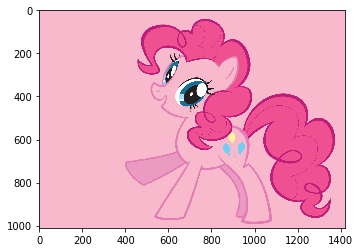

In [18]:
# Talk about the RGB-BGR fuss....
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

NOTE: When images are loaded in OpenCV, they return BGR (blue, green, red) channels, where as matplotlib expects RGB (red, green, blue). Therefore, we need  to *CONVERT* the loaded image matrix from BGR to RGB.

In [106]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(1011, 1422, 3)


#### Getting key presses

It's sometimes useful to get key presses to alter the algorithms being run, stat certain processes, run functions, etc.

The video window must be selected to register a key press. *k*, in this case, will equal 255 if nothing is pressed.

In [22]:
while True:
    # Draw the window
    window = np.zeros((300,300))
    
    # Display result
    cv2.imshow("frame", window)
    
    k = cv2.waitKey(1) & 0xff
    if k != 255: # any key pressed
        print(k)
        
    if k == 27:# escape pressed 
        break
        
cv2.destroyAllWindows()

27


# Let's play with pixels
## 1. Draw an object

- `cv2.line(image, startPoint, endPoint, rgb, thinkness)`
- `cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)`
- `cv2.circle(image, center, radius, rgb, thinkness)`
- `cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)`

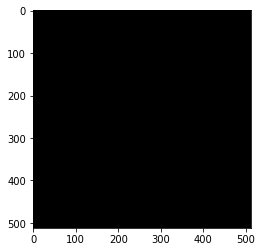

In [23]:
# Create a black image
blacky = np.zeros((512,512,3), np.uint8)
plt.imshow(blacky)

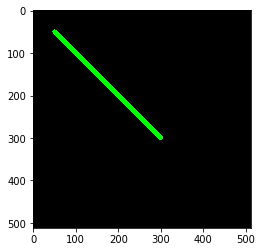

In [9]:
# Make copy of an existing image
blacky_draw = blacky.copy()

# Draw a line using cv2.line(image, startPoint, endPoint, rgb, thinkness)
cv2.line(blacky_draw, (50,50), (300,300), (0,255,0), 10)
# => Diagonal red line with thickness of 5 px


# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
#cv2.rectangle(blacky_draw, (384,0), (510,128), (0,255,0), 3)
# => Green rectangle with thickness of 3 px



# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
#cv2.circle(blacky_draw, (447,63), 63, (0,0,255), -1)
# => Blue filled circle(note that the thinkness is -1)


# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
#cv2.ellipse(blacky_draw, (256,256), (100,50), -45, 0, 180, (255,0,0), -1)
# => Red wide down-half ellipse

plt.imshow(blacky_draw)

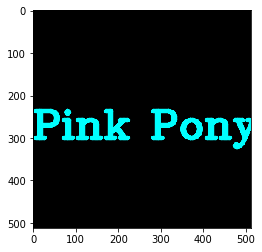

In [10]:
# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
font = cv2.FONT_HERSHEY_COMPLEX  #press tab for different operations
blacky_draw_text = blacky.copy()
cv2.putText(blacky_draw_text, 'Pink Pony', (0,300), font, 3, (0,255,255), 10, cv2.LINE_AA)
plt.imshow(blacky_draw_text)

# ROI (Person of Interest) 
## 2. Modify pixels & ROI

- You can access/modify a single pixel or ROI using Numpy indexing.
- Just like matrix indexing, `img[a, b]` refer to `a`-th row and `b`-th column.

In [107]:
# Access a pixel value(BGR order)
img[50, 235]

array([204, 185, 248], dtype=uint8)

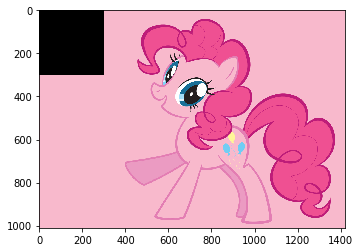

In [26]:
# Change pixel values
img_roi = img_rgb.copy()

# Define the pixel position
a_th_row = 0
b_th_col = 0

# Interation values for rows and columns
row = 300
col = 300

for i in range(row):
    for j in range(col):
        img_roi[a_th_row+i, b_th_col+j] = (0, 0, 0)

plt.imshow(img_roi)

---

## 3. Canny Edge Detection

`edges = cv2.Canny(image, threshold1, threshold2)`

- `image`: 8-bit grayscale input image
- `threshold1`/`threshold2`: thresholds for the hysteresis procedure

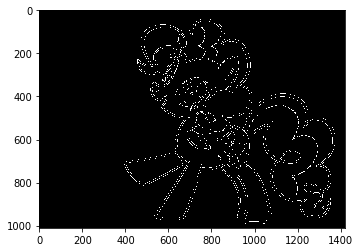

In [38]:
# Canny edge detection
threshold1 = 100
threshold2 = 100

canny_demo = img_rgb.copy()
canny = cv2.Canny(canny_demo, threshold1, threshold2)

plt.imshow(canny, cmap='gray')

## Canny edge with different thresholds

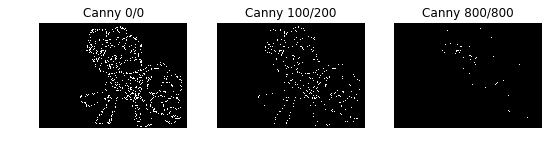

In [41]:
canny_demo = img_rgb.copy()

canny1 = cv2.Canny(canny_demo, 0, 0)
canny2 = cv2.Canny(canny_demo, 100, 200)
canny3 = cv2.Canny(canny_demo, 800, 800)


# Plot all the images
plt.figure(figsize=(9, 3));
plt.subplot(1, 3, 1); plt.title('Canny 0/0'); plt.axis('off');
plt.imshow(canny1, cmap='gray');
plt.subplot(1, 3, 2); plt.title('Canny 100/200'); plt.axis('off');
plt.imshow(canny2, cmap='gray');
plt.subplot(1, 3, 3); plt.title('Canny 800/800'); plt.axis('off');
plt.imshow(canny3, cmap='gray');

## TASK
### Write code to find edges using cv2.Canny()  method

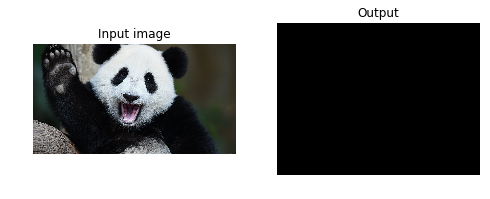

In [48]:
# Here's the input image
image = cv2.imread('images/panda.jpg', cv2.IMREAD_COLOR)


# Put magic code here..
output = np.zeros((360, 480), np.uint8)  # DUMMY


#----------------------------------------

plt.figure(figsize=(8, 3));
plt.subplot(1, 2, 1); plt.title('Input image'); plt.axis('off');

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));
plt.subplot(1, 2, 2); plt.title('Output'); plt.axis('off');

#DISPLAY YOUR OUTPUT HERE
plt.imshow(output, cmap='gray');  # DUMMY

#### Blurring

Blurring is useful when there is **noise** in an image you want to remove.

Blurred Image


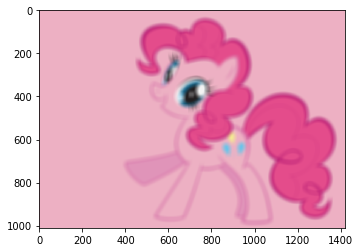

In [75]:
blur_img = img_rgb.copy()

kernel = (25, 25) # should be odd
intensity = 100

blur_img = cv2.GaussianBlur(blur_img, kernel, intensity)
plt.imshow(blur_img)
print("Blurred Image")

#### Dilating

Dilation, as it sounds, dilates pixel neighbourhoods by finding maximums over the image by the kernel size given. This is useful for expanding selections.

Dilated Image


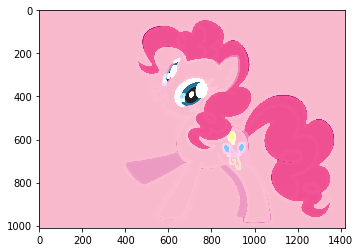

In [79]:
dilate_img = img_rgb.copy()

kernel = (10,10)

dilate_img = cv2.dilate(dilate_img, np.ones(kernel, dtype=np.uint8), iterations=1)
plt.imshow(dilate_img)
print("Dilated Image")

#### Erosion

Erosion is the opposite of dilation, useful for remove **noise**.

Eroted Image


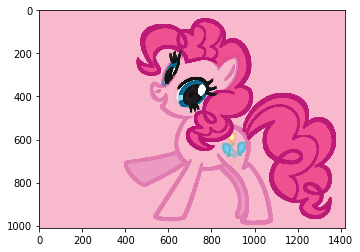

In [82]:
erosion_img = img_rgb.copy()

kernel = (10,10)
erosion_img = cv2.erode(erosion_img, np.ones(kernel, dtype=np.uint8), iterations=1)
plt.imshow(erosion_img)
print("Eroted Image")

### Thresholding

Thresholding can be thought of as a function applied to each pixel of an image. This function takes a **min** and **max** thresholding values and if the pixel value falls in this range, it will **'return'** the pixel, if not it will 'return' a **black** pixel.

Generally, thresholding is applied to a greyscale image, but may also be applied to colour images, following a similair principle.

(596, 615)


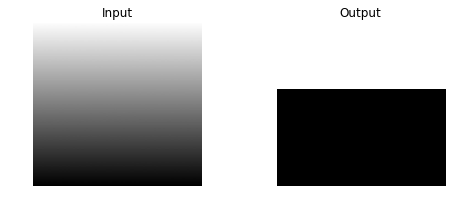

In [104]:
thresh_img_init = cv2.imread('images/threshold.jpg', cv2.IMREAD_COLOR)

thresh_img = cv2.cvtColor(thresh_img_init, cv2.COLOR_BGR2GRAY)

upper = 150
lower = 200

ret, thresh = cv2.threshold(thresh_img, upper, lower, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 3));
plt.subplot(1, 2, 1); plt.title('Input'); plt.axis('off');
plt.imshow(cv2.cvtColor(thresh_img_init, cv2.COLOR_BGR2RGB));

plt.subplot(1, 2, 2); plt.title('Output'); plt.axis('off');
plt.imshow(thresh, cmap='gray')
print(thresh.shape)

### Scaling

Height: 1011, Width: 1422


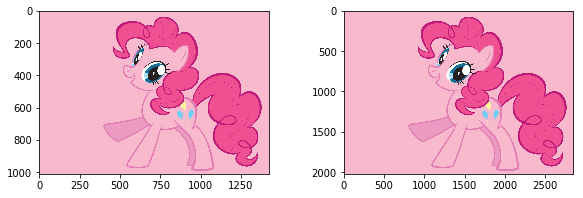

In [105]:
# Scaling

img_scale = img_rgb.copy()

#get height and width
height, width = img_scale.shape[:2]

res = cv2.resize(img_scale,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

print("Height: %d, Width: %d" %(height,width))
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(img_scale)
plt.subplot(1, 2, 2)
plt.imshow(res)

### Rotation

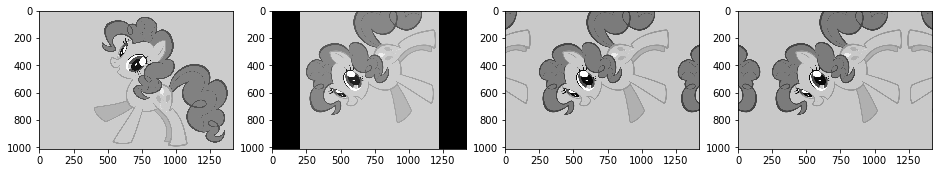

In [109]:
# Rotation

img_rot = cv2.imread('images/pink-pony.jpg', cv2.IMREAD_GRAYSCALE)

rows,cols = img_rot.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)

dst1 = cv2.warpAffine(img_rot,M,(cols,rows))
dst2 = cv2.warpAffine(img_rot,M,(cols,rows),borderMode=cv2.BORDER_WRAP)
dst3 = cv2.warpAffine(img_rot,M,(cols,rows),borderMode=cv2.BORDER_REFLECT)

# Plot the images
plt.figure(figsize=(16,3))
plt.subplot(1, 4, 1)
plt.imshow(img_rot, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(dst1, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(dst2, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(dst3, cmap='gray')

### Translation

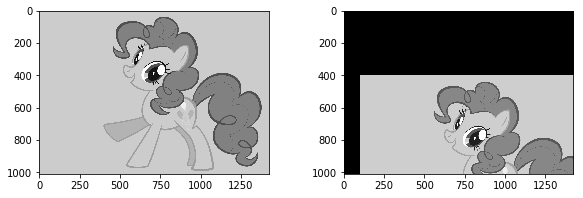

In [115]:
# Translation
img_trans = cv2.imread('images/pink-pony.jpg', cv2.IMREAD_GRAYSCALE)
rows,cols = img_trans.shape

M = np.float32([[1,0,100],[0,1,400]])
dst = cv2.warpAffine(img_trans, M, (cols,rows))


plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(img_trans, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray')

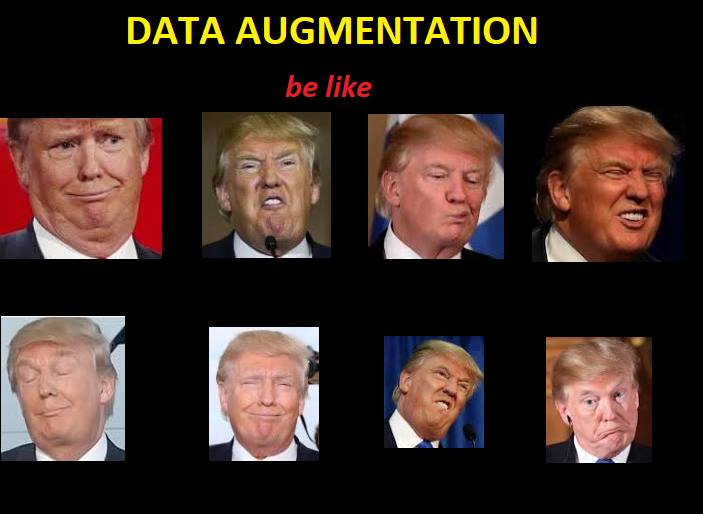

In [9]:
show_image('data-aug.jpg')

#### Using a background image to find differences (can be used for images and video)

This technique requires a background image to find the difference between the background and the current frame to find what has changed. This difference creates a **'mask'** that represents where in the image the foreground is. A draw back of this algorithm is that any movement of the camera, change of lighting, change in focus, etc. will make the current frame totally different from the background image.

The algorithm:
* load in the background image and the current frame
* find the absolute difference between the images
* create a mask that contains a 'map' of pixels that should be 'on or off'
* apply the mask to the current frame to extract the foreground by iterating over each pixel and copying all pixels from the current frame that should be part of the foreground

In [116]:
# helper functions
def plot_image(image, figsize=(8,8), recolour=False):
    """
    Plotting image matricies.
    """
    if recolour: image = bgrtorgb(image)
    plt.figure(figsize=figsize)
    if image.shape[-1] == 3:
        plt.imshow(image)
    elif image.shape[-1] == 1 or len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        raise Exception("Image has invalid shape.")

def bgrtorgb(image):
    return cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)


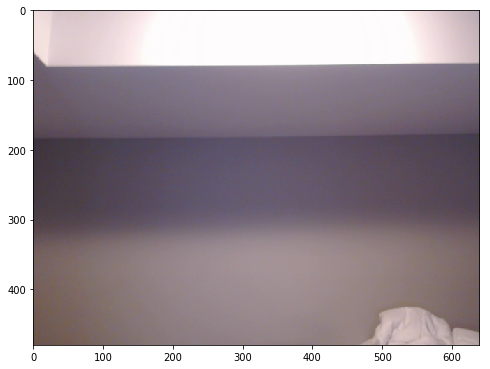

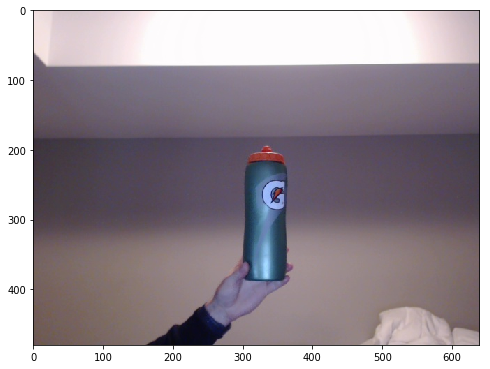

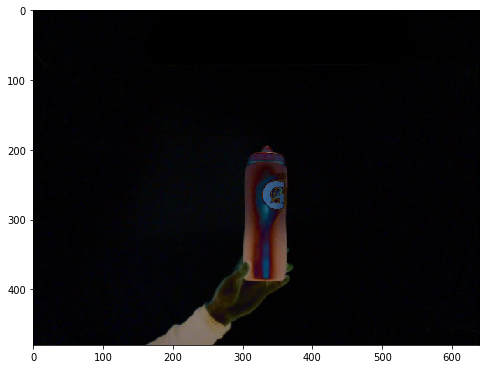

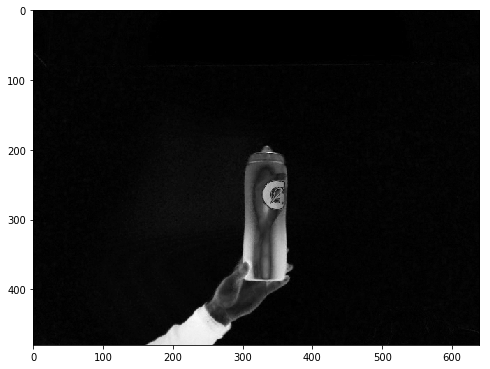

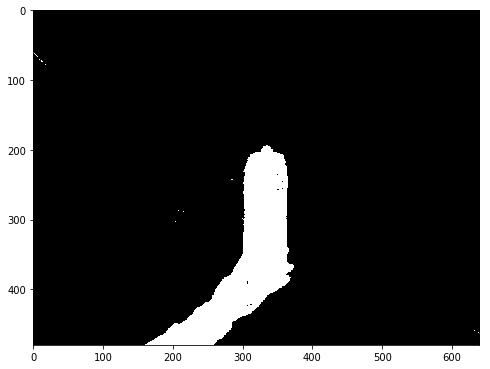

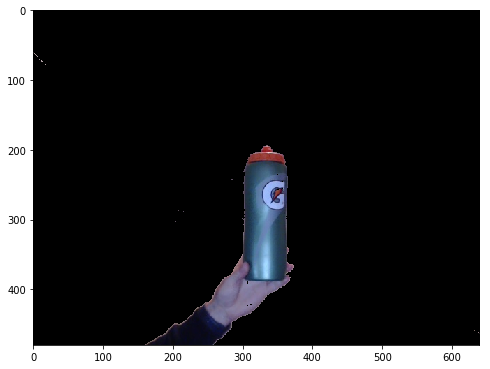

In [117]:
#another way to read image
#bg_img = cv2.imread(os.path.join(IMAGES_FOLDER, 'bg.jpg'))

bg_img = cv2.imread('images/bg.jpg')
current_frame_img = cv2.imread('images/current_frame.jpg')

# subtract current frame and bg frame
diff = cv2.absdiff(bg_img, current_frame_img)

# make the mask
mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

# mask with threshold
th, mask_thresh = cv2.threshold(mask, 10, 255, cv2.THRESH_BINARY)

mask_indexes = mask_thresh > 0

foreground = np.zeros_like(current_frame_img, dtype=np.uint8)

for i, row in enumerate(mask_indexes):
    foreground[i, row] = current_frame_img[i, row]

plot_image(bg_img, recolour=True)
plot_image(current_frame_img, recolour=True)
plot_image(diff, recolour=True)
plot_image(mask)
plot_image(mask_thresh)
plot_image(foreground, recolour=True)

#### Using motion based background subtraction algorithms (mainly video)

These algorithms are most used for video. The algorithm looks at a series of frames and computes which pixels are most static and identifies the foreground by the pixels that are moving. The MOG2 and KNN background subtractors are two different algorithms.

In [118]:
import time

ERODE = True

fgbg = cv2.createBackgroundSubtractorMOG2()
# fgbg = cv2.createBackgroundSubtractorKNN()

video = cv2.VideoCapture('images/bg_subtract_movement.mp4')

while True:
    time.sleep(0.025)
    timer = cv2.getTickCount()
    
    success, frame = video.read()
    frame_resized = cv2.resize(frame, (600, 400))
    if not success:
        break
        
    fgmask = fgbg.apply(frame)
    fgmask = cv2.resize(fgmask, (600, 400))
    
    # Apply erosion to clean up noise
    if ERODE:
        fgmask = cv2.erode(fgmask, np.ones((3,3), dtype=np.uint8), iterations=1)
    
    # Fancy code to display FPS
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
    cv2.putText(fgmask, "FPS : " + str(int(fps)), (100, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
 
    # Display result
    cv2.imshow("fgmask", fgmask)
    cv2.imshow("frame", frame_resized)
    
    k = cv2.waitKey(1) & 0xff
    if k == 27: break # ESC pressed
        
cv2.destroyAllWindows()
video.release()

### Face Detection

In [119]:
# Create the haar cascade
cascade_path = 'xml_files/haarcascade_frontalface_alt.xml'
# cascPath = 'detect/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cascade_path)

In [128]:
# Read the image to be detected
img_face = cv2.imread('images/panda.jpg')
#plt.imshow(cv2.cvtColor(img_face, cv2.COLOR_BGR2RGB))

In [129]:
def detect_faces_show(fpath):
    img = cv2.imread(fpath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    
    print("Found %d faces!" % len(faces))

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Found 0 faces!


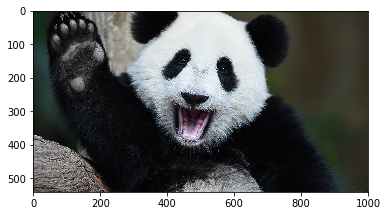

In [130]:
detect_faces_show('images/panda.jpg')

### Skin Detection

In this example, Naïve Bayes classification is employed to detect pixels corresponding to human skin in images, based just in the pixel’s color measurements.

### Training data

- A $M \times N \times 3$ array, **color a image **
- A $M \times N$ **binary mask** representing reference classification
    - Supervised learning  

Let training be a $M \times N \times 3$ array representing a color training image space, and mask a $M \times N$ binary array representing the manual classification skin/non-skin. The Gaussian fitting for Naïve Bayes classification will just use the chromaticity data (channels 1 and 2), avoiding lightness to influence on skin detection.

691 992


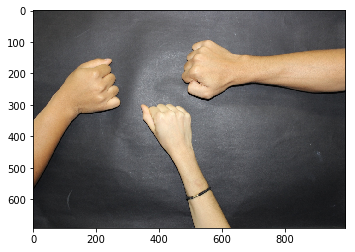

In [136]:
training_bgr = cv2.imread('images/skin-training.jpg')

training_rgb = cv2.cvtColor(training_bgr, cv2.COLOR_BGR2RGB)

training = cv2.cvtColor(training_bgr, cv2.COLOR_BGR2LAB)
M, N, _ = training.shape
print("%d %d"%(M, N))
plt.imshow(training_rgb)

- The training image provides skin samples on a dark background
- Thresholding is employed to produce the binary mask

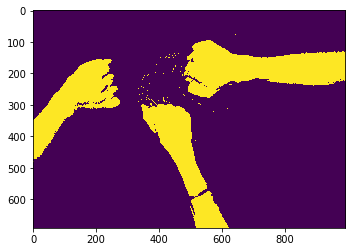

In [140]:
mask = np.zeros((M,N))
mask[training[:,:,0] > 160] = 1
mask.shape
plt.imshow(mask) # matplotlib default color space

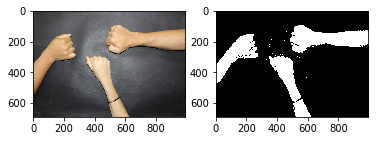

In [141]:
plt.subplot(1,2,1)
plt.imshow(training_rgb)
plt.subplot(1,2,2)
plt.imshow(mask, cmap=plt.cm.binary_r)

# Color Segmentation

In [174]:
img_ball = cv2.imread('images/blueball.png',cv2.IMREAD_COLOR)
img_ball_hsv = cv2.cvtColor(img_ball, cv2.COLOR_BGR2GRAY)

In [175]:
# HSV values
lower_red = np.array([80, 50, 0])
upper_red = np.array([255, 150, 255])

Apply the lower upper bounds in the image to create a mask

In [176]:
mask = cv2.inRange(img_ball, lower_red, upper_red)
res = cv2.bitwise_and(img_ball, img_ball, mask=mask)

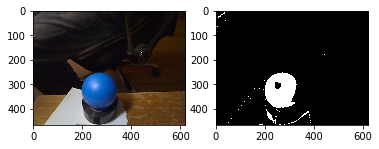

In [177]:
# Plot the images
plt.subplot(1,2,1)
plt.imshow(img_ball_rgb)
plt.subplot(1,2,2)
plt.imshow(mask, cmap=plt.cm.binary_r)

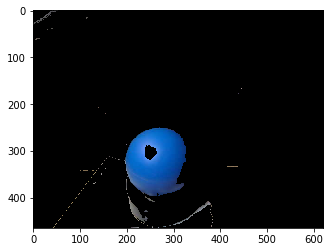

In [178]:
res_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res_rgb)

# Feature Matching
So far we've imported the modules we're going to use, and defined our two images, the template (img1) and the image we're going to search for the template in (img2).

In [179]:
img1 = cv2.imread('images/pisa.jpg',0)
img2 = cv2.imread('images/pisa_template.jpg',0)

This is the detector we're going to use for the features.

In [180]:
orb = cv2.ORB_create()

In [181]:
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

This is our BFMatcher object.

In [182]:
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

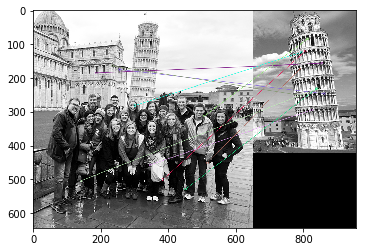

In [183]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

## Drawback of these feature matchers!?

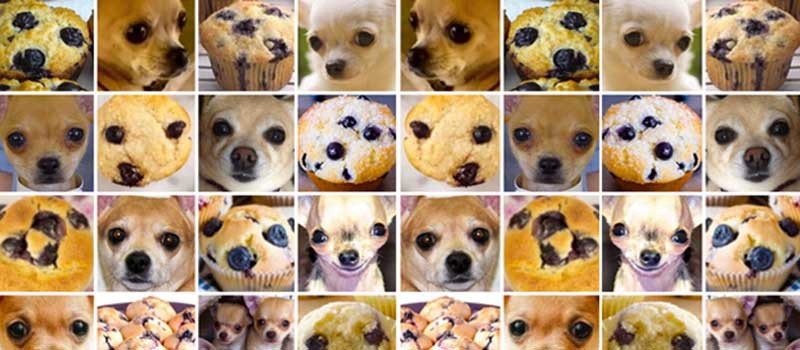

In [10]:
show_image('dog-cake.jpeg')

## How to differentiate between dogs and muffins?

### Get an idea after the break!

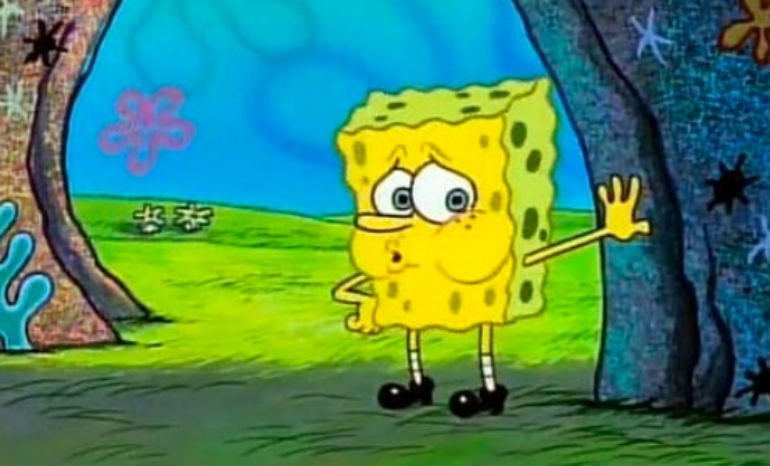

In [5]:
show_image('spongebob.jpg')

# Neural Netwooooooooorks!
To get a taste of neural networks, we're going to build a network to add two numbers between 0 and 5000.

### Below slides are stolen, literally! 

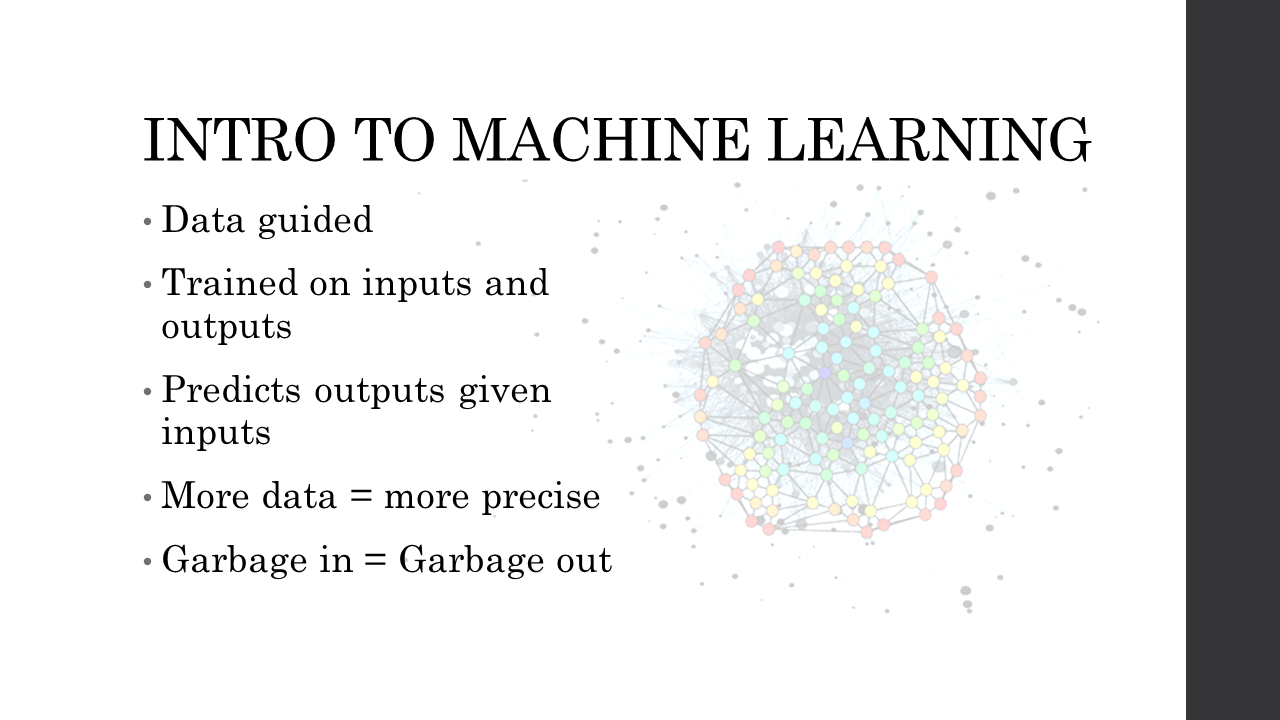

In [114]:
show_image('Slide8.PNG')

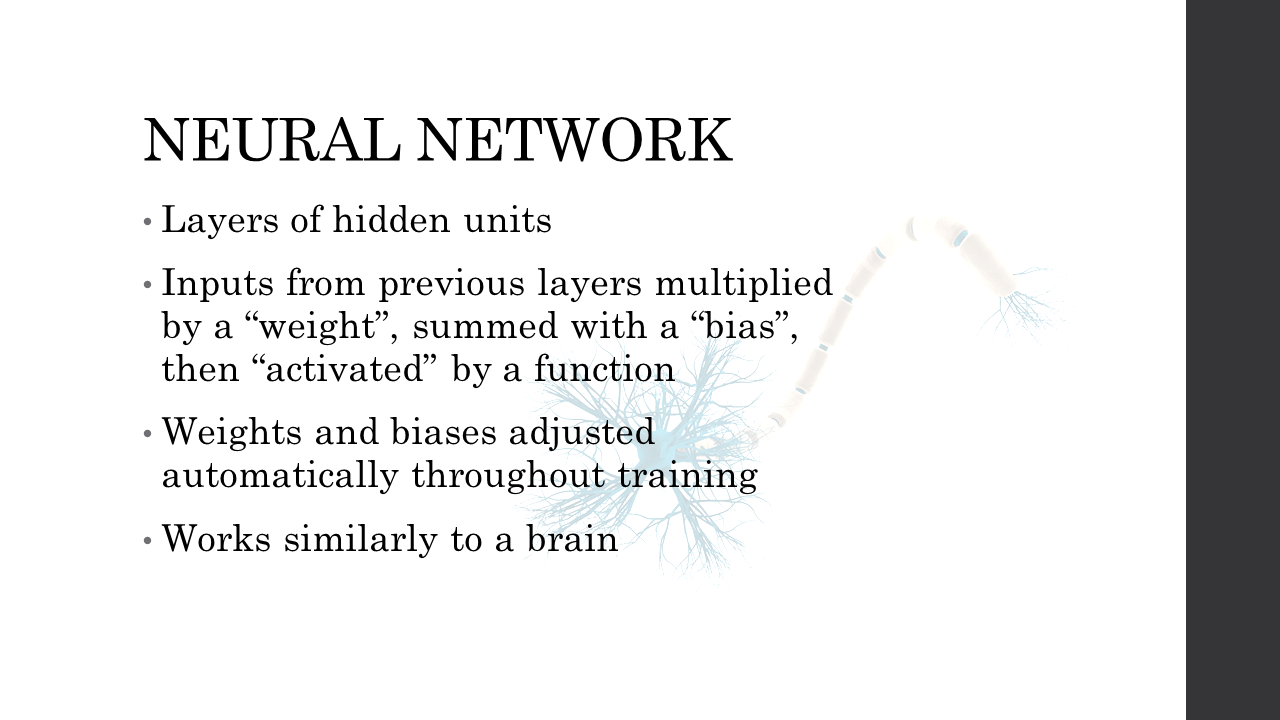

In [115]:
show_image('Slide11.PNG')

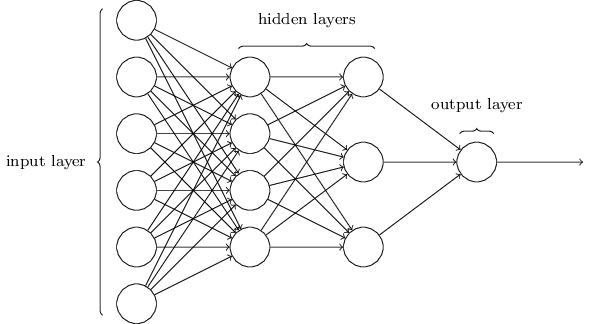

In [116]:
show_image('neuralnetwork.png')

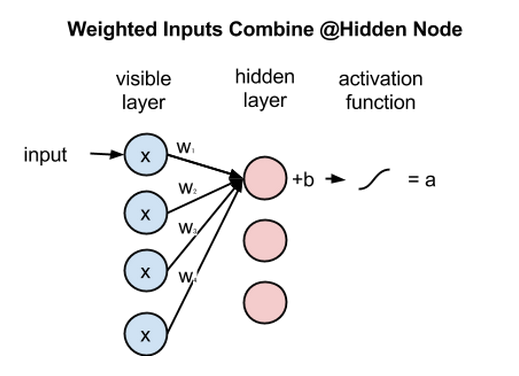

In [117]:
show_image('nn.png')

# Keywords to remeber

* Inputs
* Outputs
* Weights
* Bias
* Activation function

Here we build our neural network and compile it with a **loss function** and **optimizers** of our choice.

In [2]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

test_model = Sequential()

#input layer
test_model.add(Dense(2, input_shape=(2,), activation='relu'))

#hidden layer
test_model.add(Dense(32, activation='relu'))
test_model.add(Dense(32, activation='relu'))

#output layer
test_model.add(Dense(1, activation='relu'))

test_model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

/home/hasib/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


A nice look at the model's architecture.

In [3]:
test_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________


Here we generate some data for the model to train on.

In [4]:
import random

# list of randomized 5000 tuples, each with two numbers between 0 and 5000
data_x = [(random.randint(0, 5000), random.randint(0, 5000)) for x in range(5000)]

# list of the expected result when the two numbers are added
data_y = [x[0] + x[1] for x in data_x]
#print(data_y)

# Convert tuple to numpy array to feed to the model for training
x = np.asarray(data_x)
y = np.asarray(data_y)

In [5]:
x.shape, y.shape

((5000, 2), (5000,))

#### And now we train the model.

In [6]:
test_model.fit(x, y, batch_size=16, epochs=20, shuffle=True)

Epoch 1/20
5000/5000 [==============================] - 1s 117us/step - loss: 4055026.8303 - acc: 0.0000e+00
Epoch 2/20
5000/5000 [==============================] - 0s 65us/step - loss: 105128.2347 - acc: 0.0014
Epoch 3/20
5000/5000 [==============================] - 0s 63us/step - loss: 13010.5389 - acc: 0.0048
Epoch 4/20
5000/5000 [==============================] - 0s 66us/step - loss: 762.1044 - acc: 0.0186
Epoch 5/20
5000/5000 [==============================] - 0s 65us/step - loss: 20.7319 - acc: 0.1226
Epoch 6/20
5000/5000 [==============================] - 0s 65us/step - loss: 0.5456 - acc: 0.4586
Epoch 7/20
5000/5000 [==============================] - 0s 84us/step - loss: 0.3266 - acc: 0.5918
Epoch 8/20
5000/5000 [==============================] - 0s 66us/step - loss: 0.3232 - acc: 0.5982
Epoch 9/20
5000/5000 [==============================] - 0s 81us/step - loss: 0.3247 - acc: 0.5918
Epoch 10/20
5000/5000 [==============================] - 0s 69us/step - loss: 0.3187 - acc: 0.5

### Load the model

In [8]:
import os
MODEL_PATH = os.path.join('model')
test_model.save(os.path.join(MODEL_PATH, 'adder_model.hdf5'))

And now we have a (really bad) **neural network adder**! What's really cool about this is that you can also add numbers the network has never seen before. **Now, the model knows the mapping between two values and its corresponding result.** The model now know the function as **(sum = a+b)**

In [9]:
import os

# Load the model from disk for usage
test_model = load_model(os.path.join(MODEL_PATH, 'adder_model.hdf5'), compile=False)

a = input("Enter first number: ")
b = input("Enter second number: ")
          
# Process the data
d = np.expand_dims(np.array([a, b]), axis=0)
          
# Feed it to the model
test_model.predict(d)

Enter first number: 45
Enter second number: 20


array([[66.27422]], dtype=float32)

## WHAT NOW? MAYBE A CALCULATOR!!!!!!

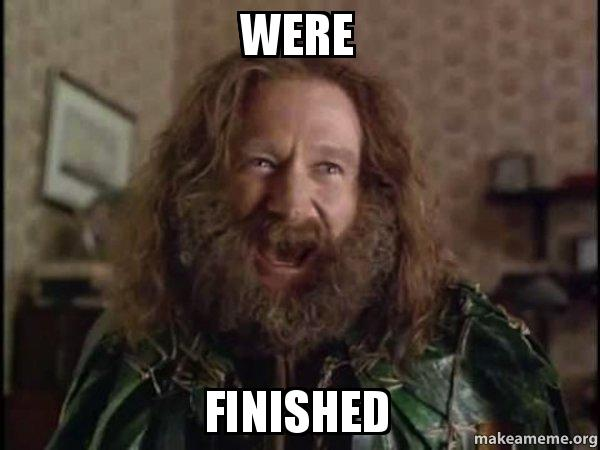

In [122]:
show_image('were-finished.jpg')

# Notebook made with 💖 by Hasib Zunair